# Run benchmarking experiments
Note: The Benchmarking Framework does currently not properly support auto-regression or lagged covariates with multiple step ahead forecasts.

In [8]:
import os
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

## Load data

In [2]:
%%capture
# create temporary data folder and download data
!rm -r tmp-data
!mkdir tmp-data
!wget -P tmp-data https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/air_passengers.csv
!wget -P tmp-data https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/wp_log_peyton_manning.csv
# !wget -P tmp-data https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/retail_sales.csv
# !wget -P tmp-data https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/yosemite_temps.csv
# !wget -P tmp-data https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/energy/ERCOT_load_2004_2021Sept.csv

In [3]:
os.listdir('tmp-data')

['air_passengers.csv', 'wp_log_peyton_manning.csv']

In [ ]:
air_passengers_df = pd.read_csv(os.path.join('tmp-data', 'air_passengers.csv'))
# peyton_manning_df = pd.read_csv(os.path.join('tmp-data', 'wp_log_peyton_manning.csv'))
# retail_sales_df = pd.read_csv(os.path.join('tmp-data', 'retail_sales.csv'))
# yosemite_temps_df = pd.read_csv(os.path.join('tmp-data', 'yosemite_temps.csv'))
# ercot_load_df = pd.read_csv(os.path.join('tmp-data', 'ERCOT_load_2004_2021Sept.csv'))[['ds', 'y']]

# Streamlined CV


In [13]:
from neuralprophet.benchmark import Dataset, NeuralProphetModel, NeuralProphetParams
from neuralprophet.benchmark import SimpleExperiment, SimpleBenchmark, CVExperiment, CVBenchmark

  

In [14]:
ts = Dataset(df = air_passengers_df, name = "air_passengers", freq = "MS")
params = NeuralProphetParams(seasonality_mode="multiplicative")
metrics = ["MAE", "MSE"]
cv = CrossValidationExperiment(
    model_class=NeuralProphetModel,
    params=params,
    data=ts,
    error_methods=metrics,
    test_percentage=25,
    num_folds=3,
  )
cv.run_cv()

NameError: name 'Dataset' is not defined

# Streamlined Benchmark

In [ ]:
dataset_list = [
    Dataset(df = air_passengers_df, name = "air_passengers", freq = "MS"),
    # Dataset(df = peyton_manning_df, name = "peyton_manning", freq = "D"),
    # Dataset(df = retail_sales_df, name = "retail_sales", freq = "D"),
    # Dataset(df = yosemite_temps_df, name = "yosemite_temps", freq = "5min"),
    # Dataset(df = ercot_load_df, name = "ercot_load", freq = "H"),
]

In [12]:
params_list = [
    NeuralProphetParams(),
    NeuralProphetParams(n_changepoints= 5),
    NeuralProphetParams(seasonality_mode = "multiplicative", learning_rate = 0.1),
]


TypeError: __init__() takes 0 positional arguments but 1 was given

# 2 Benchmarking using Benchmark Framework

In [10]:
from neuralprophet.benchmark import Dataset, Model, SimpleExperiment, SimpleBenchmark, CVExperiment, CVBenchmark

## 2.0 Configure Datasets and Model Parameters
First, we define the datasets that we would like to benchmerk on.

In [11]:
datasets = [
    Dataset(df = air_passengers_df, name = "air_passengers", freq = "MS"),
    # Dataset(df = peyton_manning_df, name = "peyton_manning", freq = "D"),
    # Dataset(df = retail_sales_df, name = "retail_sales", freq = "D"),
    # Dataset(df = yosemite_temps_df, name = "yosemite_temps", freq = "5min"),
    # Dataset(df = ercot_load_df, name = "ercot_load", freq = "H"),
]

Next, we define the models that we want to evaluate and set their hyperparameters.

In [12]:
parameters = [
    {},
    {"n_changepoints": 5},
    {"seasonality_mode": "multiplicative", "learning_rate": 0.1},
]

## 2.2 CVBenchmark: CrossValidation Benchmarking
Setting up a crossvalidated benchmark is just as simple:

In [17]:
experiments_cv = []
for d in datasets:
    for m in models:
        experiments_cv.append(CVExperiment(
            model=m, 
            dataset=d, 
            valid_pct=0.1, 
            n_folds=3))

In [ ]:
benchmark_cv = CVBenchmark(
    experiments = experiments_cv,
    # metrics = ['MAE', 'MSE']
)
results_summary, results_train, results_val = benchmark_cv.run()

We now also get a summary DataFrame showing the metrics' mean and standard deviation over all folds.

In [19]:
results_summary

,data,model,params,train_MAE,train_MAE_std,train_MSE,train_MSE_std,val_MAE,val_MAE_std,val_MSE,val_MSE_std
0,air_passengers,NeuralProphet,{},11.919034,2.274636,267.856055,96.151321,31.943411,1.131166,1424.348674,70.604711
1,air_passengers,NeuralProphet,{'n_changepoints': 5},12.571386,2.224153,278.142151,95.803883,32.669716,1.482547,1507.468424,138.837527
2,air_passengers,NeuralProphet,"{'seasonality_mode': 'multiplicative', 'learni...",5.947840,0.584368,59.400076,11.142714,19.550558,6.993353,535.953837,270.510983
3,peyton_manning,NeuralProphet,{},0.343092,0.010171,0.240947,0.010685,0.492389,0.122705,0.476242,0.203495
4,peyton_manning,NeuralProphet,{'n_changepoints': 5},0.353422,0.009915,0.255995,0.015649,0.500979,0.186996,0.489329,0.343209
5,peyton_manning,NeuralProphet,"{'seasonality_mode': 'multiplicative', 'learni...",0.339933,0.008400,0.240326,0.010455,0.547279,0.163976,0.578785,0.299463


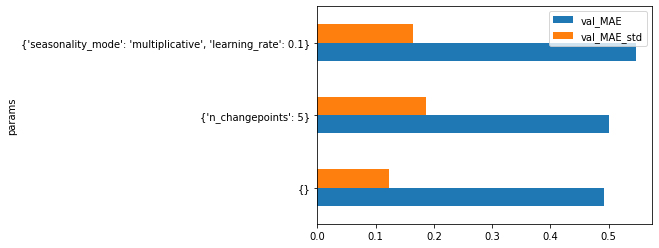

In [20]:
peyton_manning = results_summary[results_summary['data'] == 'peyton_manning']
plt = peyton_manning.plot(x='params', y=['val_MAE', 'val_MAE_std'], kind='barh')

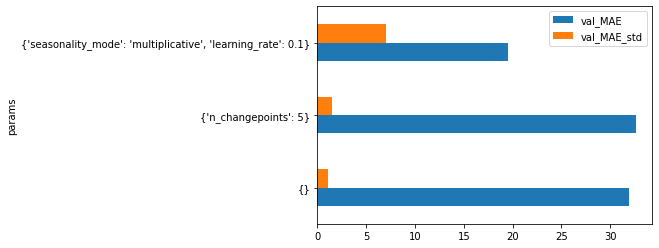

In [21]:
air_passengers = results_summary[results_summary['data'] == 'air_passengers']
plt = air_passengers.plot(x='params', y=['val_MAE', 'val_MAE_std'], kind='barh')

The metrics for each fold are also recoreded individually:

In [22]:
results_val

,data,model,params,MAE,MSE
0,air_passengers,NeuralProphet,{},"[33.51242446899414, 31.428998947143555, 30.888...","[1363.7059326171875, 1385.9722900390625, 1523...."
1,air_passengers,NeuralProphet,{'n_changepoints': 5},"[34.76591873168945, 31.658613204956055, 31.584...","[1433.631103515625, 1386.828125, 1701.94604492..."
2,air_passengers,NeuralProphet,"{'seasonality_mode': 'multiplicative', 'learni...","[16.674509048461914, 12.793660163879395, 29.18...","[439.78277587890625, 263.37188720703125, 904.7..."
3,peyton_manning,NeuralProphet,{},"[0.6265700459480286, 0.5205954909324646, 0.330...","[0.7559162974357605, 0.3951578736305237, 0.277..."
4,peyton_manning,NeuralProphet,{'n_changepoints': 5},"[0.7652839422225952, 0.3764779269695282, 0.361...","[0.9745428562164307, 0.23603081703186035, 0.25..."
5,peyton_manning,NeuralProphet,"{'seasonality_mode': 'multiplicative', 'learni...","[0.7450417876243591, 0.5532765984535217, 0.343...","[0.9957593083381653, 0.43445906043052673, 0.30..."


In [23]:
# remove temporary data folder.
!rm -r tmp-data